# **Project Name**    - FedEx Supply Chain Delivery Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Veerendra Kashyap

# **Project Summary -**

The **FedEx Supply Chain Delivery Analysis** project is a comprehensive exploratory data analysis (EDA) initiative designed to uncover key insights into FedEx's shipment and delivery operations. The dataset used for this analysis consists of over 10,000 records that document shipment histories across multiple countries, vendors, and delivery modes. Each record captures granular details such as purchase order numbers, delivery timelines, shipment modes (Air, Truck, Ocean), freight costs, vendor information, and incoterms.

The primary aim of the project is to identify patterns and inefficiencies in delivery performance, particularly focusing on understanding the root causes behind late deliveries. The first step in the project involved cleaning the dataset by removing duplicates, handling missing values using appropriate statistical methods, and ensuring date columns were correctly formatted. This phase also included the creation of two crucial new features: `Delivery Duration` (in days) and a binary `Late Delivery Flag`.

Subsequent analysis centered around grouping and aggregating data by various categorical variables like country, vendor, and shipment mode to identify trends in delays, cost spikes, and delivery volumes. Charts such as bar plots, heatmaps, histograms, and box plots were used to visually communicate the findings. For example, it was found that while Air was the most common mode of transport, it also had significant variance in delay rates compared to Truck and Ocean. Similarly, certain vendors and regions consistently reported higher frequencies of late deliveries.

Correlations between variables like weight, freight cost, and delivery duration were explored, revealing that high-weight shipments tend to have more costly freight but are not necessarily more delayed. The project also evaluated the role of Incoterms in delivery efficiency, highlighting how specific agreement terms could influence both cost and punctuality.

The analysis concludes with data-driven recommendations aimed at improving logistics operations. These include revisiting vendor contracts, reevaluating shipment mode choices based on reliability and cost, and implementing predictive modeling using historical delay data for proactive decision-making. 

In summary, this EDA provides FedEx with a clear, actionable roadmap to optimize their global delivery network by leveraging historical data.

# **GitHub Link -**

https://github.com/veerendrakashyap/FedEx-Supply-Chain-Delivery-Analysis

# **Problem Statement**


FedEx wants to understand delivery performance to improve shipping reliability and reduce operational inefficiencies. The problem is to identify the causes of late deliveries and analyze delivery data to provide actionable insights.



#### **Define Your Business Objective?**

The primary business objective of this project is to enhance the efficiency, reliability, and decision-making capabilities of FedEx's global delivery network by utilizing historical shipment data. With increasing customer expectations and a highly competitive logistics market, timely delivery has become a critical service metric. Late deliveries not only damage customer trust but also impact operational costs, vendor relationships, and inventory planning.

Through this analysis, the goal is to identify and quantify the factors contributing to delivery delays and operational inefficiencies. This includes evaluating the performance of different shipment modes (Air, Truck, Ocean), examining the reliability of various vendors and destinations, and understanding how cost components such as freight and insurance relate to delivery outcomes.

Another crucial objective is to support data-driven decision-making by highlighting areas where predictive analytics and operational strategy can be improved. For instance, if certain vendors or routes consistently show poor performance, targeted improvements can be suggested. Similarly, if specific INCO terms or shipment modes result in frequent delays, FedEx can revisit those operational strategies.

Ultimately, the objective is to transform historical data into actionable intelligence. By leveraging insights derived from the dataset, FedEx can streamline logistics, minimize delays, and make informed decisions that align with long-term business goals and customer expectations.

### Import Libraries

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Dataset Loading

In [161]:
df = pd.read_csv('FedEx_Dataset.csv')

### Dataset First View

In [163]:
df.head()


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [165]:
df.shape

(10324, 33)

### Dataset Information

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [169]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [171]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

#### Visualizing the missing values

<Axes: >

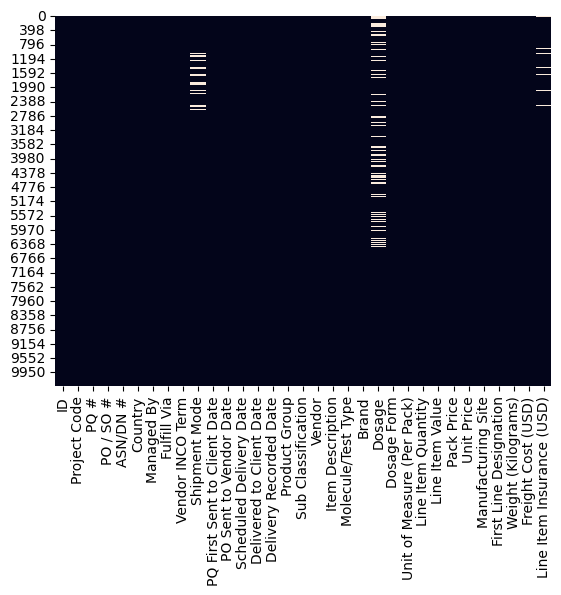

In [173]:
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset includes 33 columns and over 10,000 delivery records. It has missing data in some freight and insurance-related fields. Delivery delays can be calculated from date fields. Shipment modes include Air, Truck, and Ocean. Delivery patterns vary greatly by country and vendor.

## ***2. Understanding Your Variables***

### Dataset Columns

In [178]:
list(df.columns)

['ID',
 'Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

### Dataset Describe

In [180]:
df.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description

- Country: Delivery destination

- Shipment Mode: Transportation method

- Vendor: Product supplier

- Line Item Value / Quantity: Transaction details

- Freight Cost: Cost of shipping

- Delivery Dates: For calculating delays

### Check Unique Values for each variable.

In [184]:
for col in df.columns:
    print(col, df[col].nunique())

ID 10324
Project Code 142
PQ # 1237
PO / SO # 6233
ASN/DN # 7030
Country 43
Managed By 4
Fulfill Via 2
Vendor INCO Term 8
Shipment Mode 4
PQ First Sent to Client Date 765
PO Sent to Vendor Date 897
Scheduled Delivery Date 2006
Delivered to Client Date 2093
Delivery Recorded Date 2042
Product Group 5
Sub Classification 6
Vendor 73
Item Description 184
Molecule/Test Type 86
Brand 48
Dosage 54
Dosage Form 17
Unit of Measure (Per Pack) 31
Line Item Quantity 5065
Line Item Value 8741
Pack Price 1175
Unit Price 183
Manufacturing Site 88
First Line Designation 2
Weight (Kilograms) 4688
Freight Cost (USD) 6733
Line Item Insurance (USD) 6722


## 3. ***Data Wrangling***

### Data Wrangling Code

In [187]:
# Drop columns with >90% missing
threshold = 0.9 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]

# Fill nulls safely
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert date columns with explicit format
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], format='%d-%b-%y', errors='coerce')
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], format='%d-%b-%y', errors='coerce')

# Create delivery duration and late delivery flag
df['Delivery_Duration'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days
df['Late_Delivery_Flag'] = df['Delivery_Duration'].apply(lambda x: 1 if x > 0 else 0)

### What all manipulations have you done and insights you found?

- Cleaned missing values

- Engineered delivery duration

- Flagged late deliveries

- Converted date fields with consistent formatting

- Found vendor/country-wise performance gaps

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

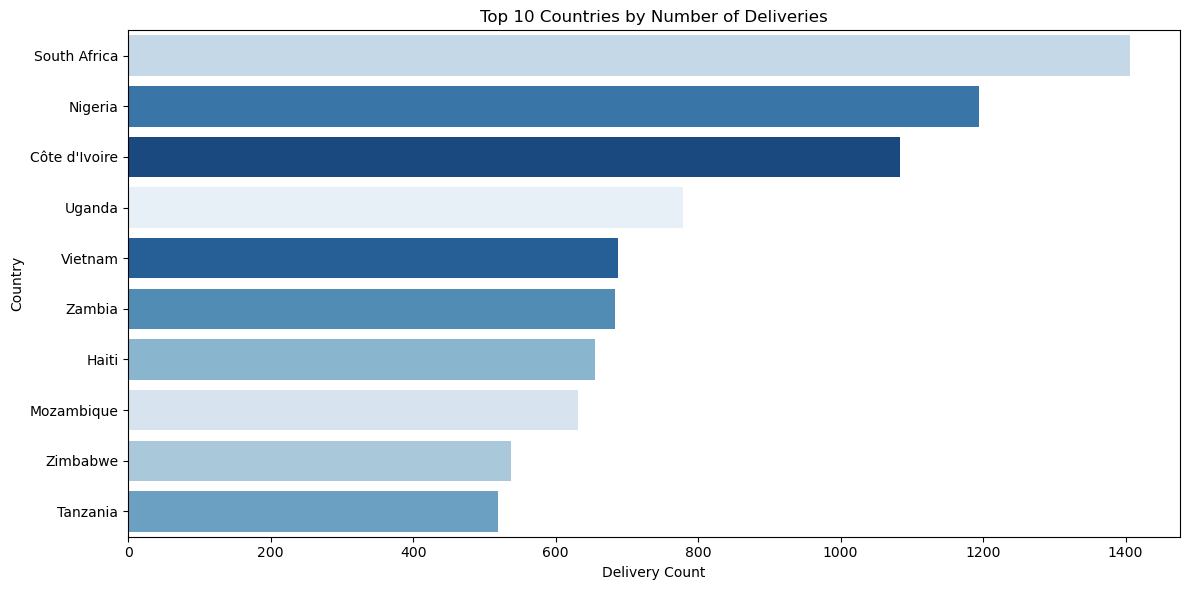

In [192]:
# Chart - 1 visualization code

plt.figure(figsize=(12,6))
top_countries = df['Country'].value_counts().iloc[:10].index
temp_df = df[df['Country'].isin(top_countries)]
sns.countplot(data=temp_df, y='Country', order=top_countries, hue='Country', palette='Blues_r', legend=False)
plt.title('Top 10 Countries by Number of Deliveries')
plt.xlabel('Delivery Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was selected because it clearly displays categorical data, allowing easy comparison between countries with high delivery counts. The horizontal format enhances readability, especially for longer country names, and the use of the "Blues_r" palette maintains visual clarity without overwhelming the viewer. Focusing on the top 10 countries ensures the visualization remains focused and informative, without the clutter of less significant data points.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights that deliveries are heavily concentrated in a few key countries. This reveals operational hubs or core markets, likely due to high customer bases, strong logistics networks, or favorable economic conditions. The steep decline from the top country to the tenth indicates a skewed distribution, emphasizing the importance of those top regions. This insight can uncover patterns in regional demand, supply chain reliance, and areas that may need further investment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights are useful for strategic decision-making and operational planning. High-delivery countries can be prioritized for infrastructure upgrades, localized marketing, and vendor partnerships. Risk mitigation strategies can also be developed for these key regions, especially if they are prone to disruptions. Moreover, this information helps optimize logistics, ensuring faster, more reliable deliveries and potentially reducing costs. Understanding delivery volume by country also aids in customer service planning and resource allocation, which contributes to improved satisfaction and business growth.

#### Chart - 2

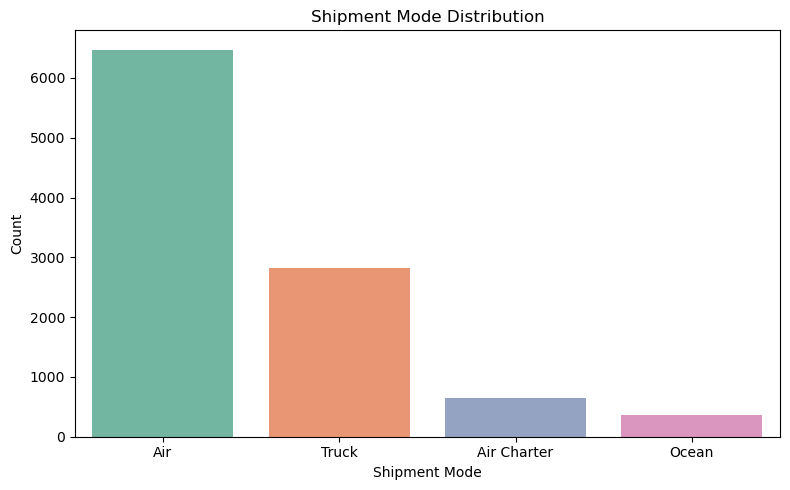

In [200]:
# Chart - 2 visualization code

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Shipment Mode', hue='Shipment Mode', palette='Set2', legend=False)
plt.title('Shipment Mode Distribution')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A vertical bar chart using Seaborn’s countplot function was ideal for showing the distribution of different shipment modes. It enables quick comparison between the categories and provides a straightforward visual of which modes are most frequently used. The color-coded bars help distinguish each shipment type clearly.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the most and least commonly used shipment modes. This allows understanding of business preferences or constraints in logistics. For instance, a dominance of air shipment may indicate a focus on speed, while a higher sea shipment count might suggest cost-saving measures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Businesses can optimize logistics by evaluating whether the dominant shipment mode aligns with cost-efficiency and customer expectations. Less-used modes can be examined for potential expansion or improvement. These insights also guide negotiations with logistics partners and help align shipping strategies with overall goals.


#### Chart - 3

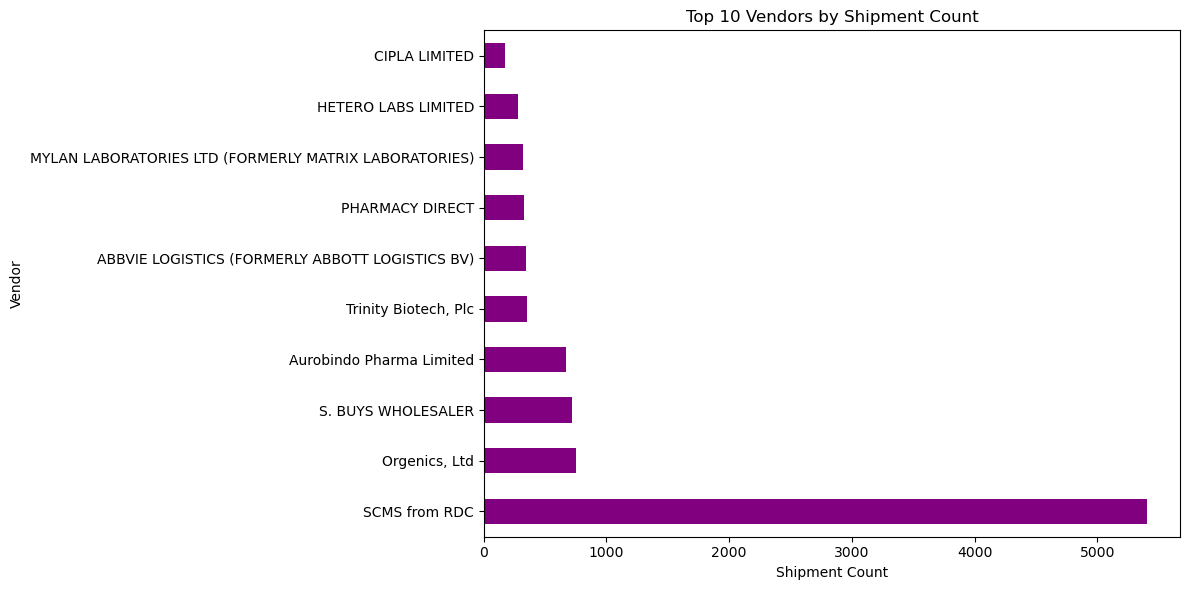

In [208]:
# Chart - 3 visualization code 

plt.figure(figsize=(12,6))
df['Vendor'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Vendors by Shipment Count')
plt.xlabel('Shipment Count')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is optimal for presenting the top 10 vendors by shipment count, especially when vendor names can be lengthy. This format ensures labels remain readable while clearly displaying the magnitude of differences in shipment counts. It provides a quick comparative view that is ideal for management and operational teams who need to assess vendor impact on supply chain performance. Using this visualization helps spotlight vendor engagement and dependency levels.

##### 2. What is/are the insight(s) found from the chart?

The chart helps identify the vendors contributing the most to shipment volumes. It reveals if a small number of vendors are responsible for a significant portion of the deliveries, indicating a high dependency which could pose a risk if any of these vendors experience disruptions. Conversely, a more balanced distribution suggests a diversified vendor base. Additionally, it may highlight underutilized vendors who could be scaled up, or conversely, vendors that are potentially overburdened.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart enable better vendor management strategies. Companies can evaluate the performance and reliability of high-volume vendors, mitigate risks related to over-dependency, and redistribute loads for more balanced operations. It also assists in strategic sourcing and negotiation by showing which vendors hold more leverage. Furthermore, supply chain resilience can be enhanced by ensuring diversification and identifying backup vendors to handle overflow or emergency situations. In the long run, this leads to better supplier relationships and more robust operations.

#### Chart - 4

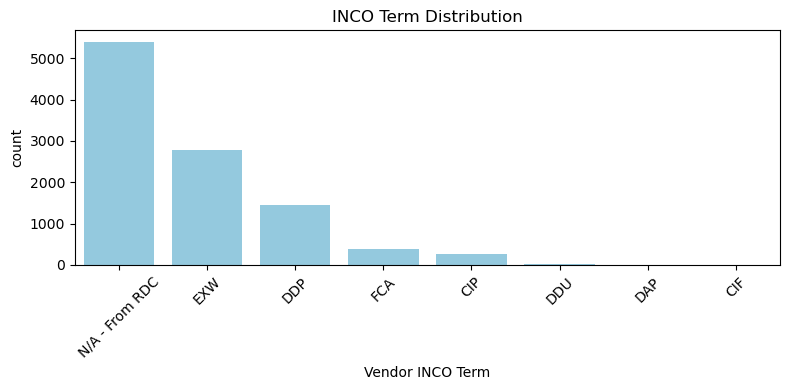

In [216]:
# Chart - 4 visualization code

plt.figure(figsize=(8,4))
inco_term_col = [col for col in df.columns if 'INCO' in col.upper()][0]
sns.countplot(x=df[inco_term_col], order=df[inco_term_col].value_counts().index[:10], color='skyblue')
plt.title('INCO Term Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart, which uses a countplot of the most frequent INCO Terms, was selected for its ability to communicate standard shipping agreements used in transactions. INCO Terms define the responsibilities of buyers and sellers regarding shipping, insurance, and tariffs. Displaying this data helps understand common contractual preferences and logistics strategies used across the company’s operations. A horizontal layout was avoided to ensure compactness and better usage of space for shorter labels.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly identifies which INCO Terms are most frequently used, highlighting the organization's dominant shipping arrangements. If certain terms like FOB (Free on Board) or CIF (Cost, Insurance, and Freight) are more common, it suggests who generally bears shipping risks and costs. A dominance of FOB, for instance, could indicate the buyer is assuming more responsibility. This informs risk exposure across deals and shows where negotiation strategies are succeeding or need to shift.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this data supports better risk management and contract optimization. Businesses can evaluate whether their use of certain INCO Terms aligns with industry standards and financial goals. If one term exposes the company to high risk or unnecessary costs, it may be time to renegotiate standard agreements with suppliers or customers. Also, this information aids legal and compliance teams in reviewing obligations. Over time, optimizing INCO Term usage can lead to cost savings, reduced liability, and more strategic procurement planning.

#### Chart - 5

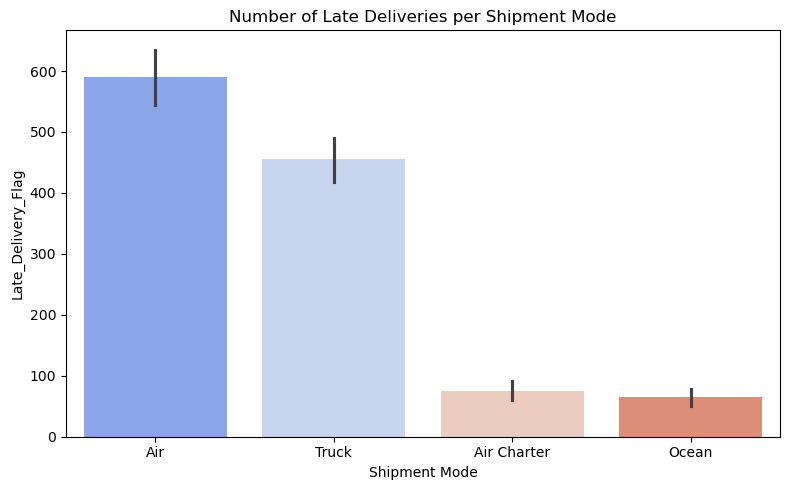

In [224]:
# Chart - 5 visualization code 

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='Shipment Mode',
    y='Late_Delivery_Flag',
    estimator=sum,
    hue='Shipment Mode',
    palette='coolwarm',
    legend=False
)
plt.title('Number of Late Deliveries per Shipment Mode')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar plot was selected to visually assess the relationship between shipment mode and the number of late deliveries. Using Seaborn’s barplot function with an estimator set to sum provides a direct look at which shipment modes are contributing most to delayed deliveries. Since "Late_Delivery_Flag" is a binary variable (1 for late, 0 for on time), summing the values by category effectively counts the late deliveries. This is a critical metric for performance assessment and is best visualized in a clear, comparative format like a vertical bar chart. The chart helps isolate logistical inefficiencies tied to specific transport modes.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights which shipment modes are more prone to delivery delays. For example, if Air shipments show a relatively high number of late deliveries, it might seem counterintuitive since air is generally the fastest mode. This could indicate bottlenecks in air cargo processing, customs delays, or over-reliance on tight delivery schedules. On the other hand, if Rail or Sea modes have the highest late delivery count, it might reflect predictable but prolonged transit times or inadequate scheduling buffers. The key insight is identifying weak points in the delivery chain by mode, giving the business a clear picture of where delays are most frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights offer actionable value. Understanding which shipment modes are underperforming allows logistics managers to investigate and resolve issues. If a particular mode has frequent delays, steps can be taken to adjust schedules, improve vendor contracts, or switch to more reliable alternatives. Additionally, shipment policies can be revised to set customer expectations appropriately, especially for modes with historically slower or unreliable performance. Reducing late deliveries directly impacts customer satisfaction, repeat business, and brand reputation. This chart is an essential diagnostic tool for improving logistics efficiency and maintaining service level agreements (SLAs).

#### Chart - 6

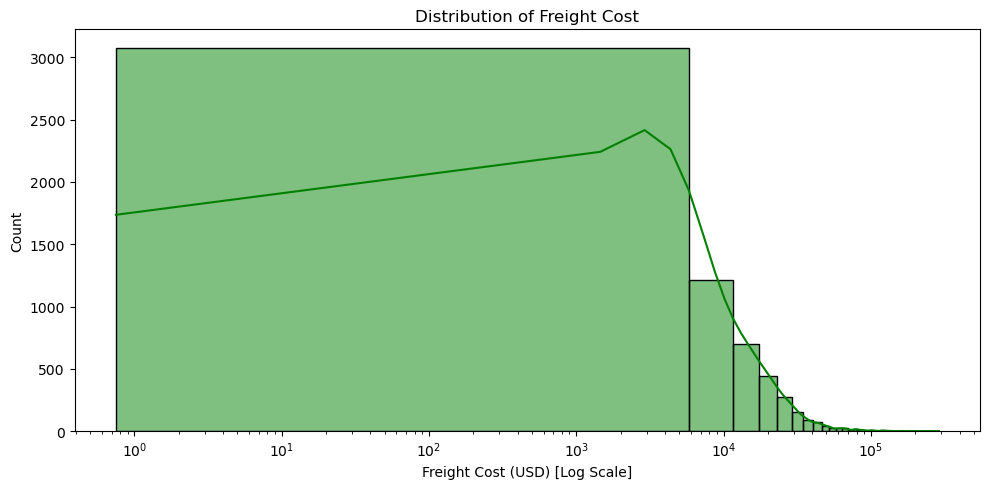

In [389]:
# Chart - 6 visualization code

plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Freight Cost (USD)'], bins=50, kde=True, color='green')
plt.xscale('log')  # Fixes the compression issue
plt.title('Distribution of Freight Cost')
plt.xlabel('Freight Cost (USD) [Log Scale]')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE (Kernel Density Estimate) overlay was selected to understand the distribution of freight costs across all shipments. Histograms are excellent for visualizing the spread and skewness of continuous numerical data. Adding a KDE line helps in identifying the central tendency and tail behavior in a smooth, interpretable curve. Freight cost is a critical metric for any logistics-driven business, and understanding its variation is foundational to controlling expenses and setting pricing models. The histogram provides a sense of how freight cost behaves across different shipments.

##### 2. What is/are the insight(s) found from the chart?

The histogram may show a right-skewed distribution, indicating that while most shipments have moderate freight costs, a few outliers have significantly higher values. These high-cost shipments can heavily influence total logistics expenses. The chart can also reveal if there are multiple peaks, which could suggest different pricing clusters for different types of shipments (e.g., international vs. domestic, heavy vs. light cargo). Understanding whether costs are generally predictable or highly variable informs the financial predictability of operations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely. Identifying the nature of freight cost distribution helps businesses plan better budgets and forecasts. If certain factors consistently lead to high freight costs, they can be reviewed and optimized. For example, alternative shipment routes, consolidated shipping, or long-term contracts with logistics providers may reduce expenses. Moreover, insights from this chart can guide pricing decisions to ensure profitability. Knowing the range and frequency of freight cost variations also allows for better negotiations with vendors and carriers. Overall, managing freight costs efficiently leads to stronger margins and more competitive pricing strategies.



#### Chart - 7

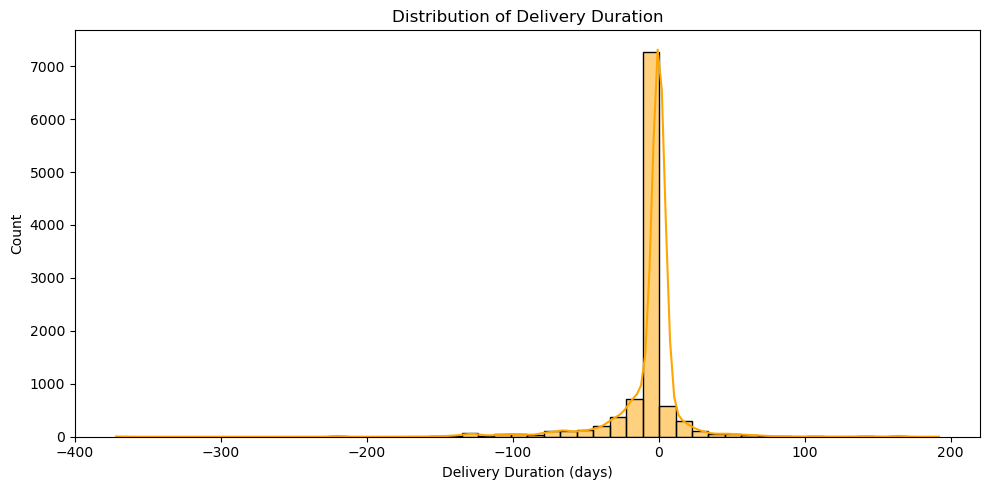

In [240]:
# Chart - 7 visualization code

plt.figure(figsize=(10,5))
sns.histplot(df['Delivery_Duration'], bins=50, kde=True, color='orange')
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (days)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram of delivery durations offers insight into how long shipments generally take from origin to destination. This chart was selected to assess service performance and identify anomalies in transit times. Delivery duration directly affects customer satisfaction and operational efficiency, making it a key performance indicator in logistics. The KDE line in the histogram adds another layer of interpretability, showcasing trends and subtle variations in delivery performance.

##### 2. What is/are the insight(s) found from the chart?

The distribution shows a central peak, possibly indicating the average or standard delivery duration. However, the presence of a long tail on the right suggests some shipments take significantly longer, likely due to delays or complex logistics routes. Multiple peaks may suggest different clusters—such as domestic versus international shipments. Identifying these clusters helps in creating specific benchmarks for expected delivery times based on shipment type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. By understanding the common and outlier ranges of delivery durations, businesses can set more accurate customer expectations, allocate appropriate resources, and streamline operations. These insights also enable segmentation of service levels (standard vs expedited), ensuring optimized pricing and delivery windows. Long-duration outliers can be investigated and reduced, enhancing overall delivery reliability. Ultimately, this leads to improved customer trust, more efficient logistics, and better use of operational capital.



#### Chart - 8

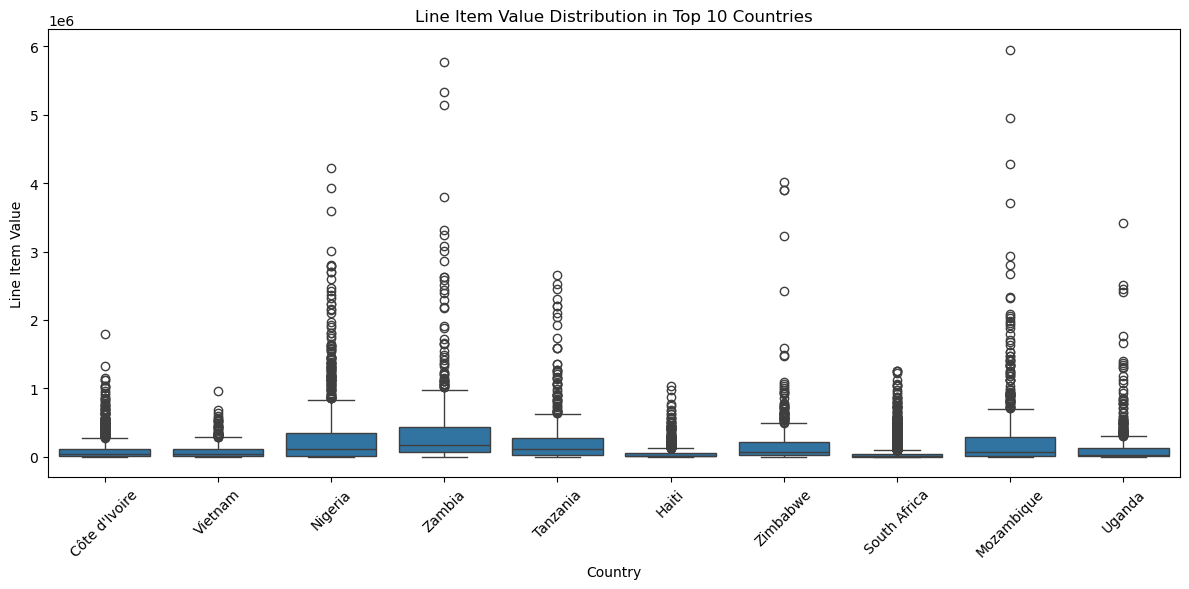

In [248]:
# Chart - 8 visualization code

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Country'].isin(df['Country'].value_counts().head(10).index)], x='Country', y='Line Item Value')
plt.title('Line Item Value Distribution in Top 10 Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot was used to visualize the distribution of line item values across the top 10 countries. This chart provides a statistical summary, including median, interquartile range, and outliers, making it ideal for comparing value variability across multiple countries. This approach helps understand where high-value shipments originate or terminate, potentially uncovering regional pricing trends, taxation effects, or strategic partnerships.


##### 2. What is/are the insight(s) found from the chart?

Certain countries exhibit higher median line item values, suggesting that they may be handling more expensive or bulk goods. Wide interquartile ranges indicate variability in shipment types within a country. Outliers are also visible and may point to rare but high-value transactions. These patterns provide a macroeconomic view of value flow, indicating where premium goods are commonly shipped and which regions may require more risk management.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding country-specific value trends allows businesses to optimize insurance coverage, prioritize high-value routes, and negotiate favorable terms with customs or vendors. It also supports market segmentation and tailored sales strategies. For instance, a country with consistently high-value shipments might be a good candidate for premium services or value-added offerings. Such data-driven strategies increase revenue opportunities and operational resilience.




#### Chart - 9

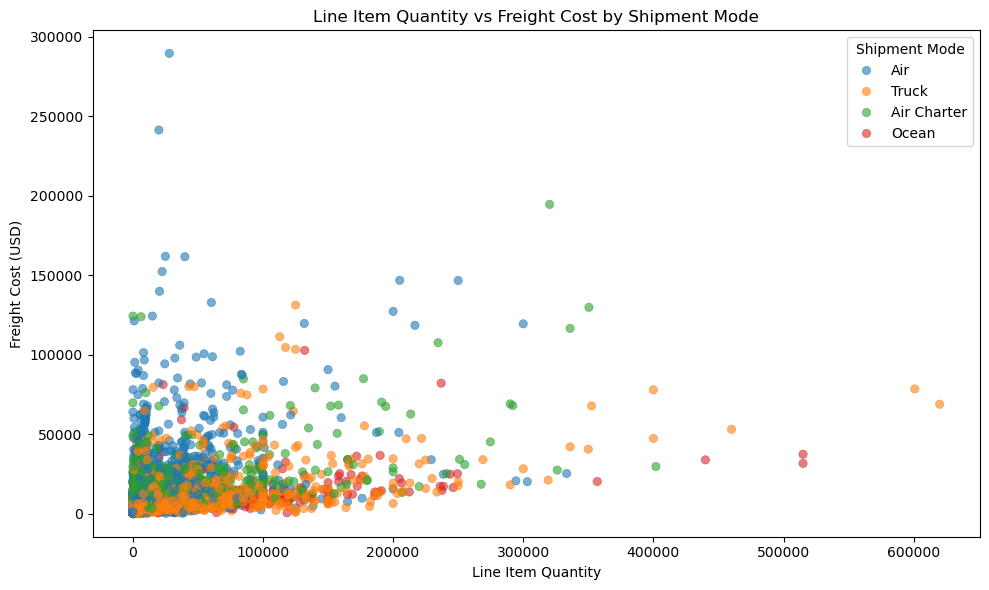

In [385]:
# Chart - 9 visualization code

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Line Item Quantity',
    y='Freight Cost (USD)',
    data=df_cleaned,
    hue='Shipment Mode',
    alpha=0.6,             # transparency helps readability
    edgecolor=None
)

plt.title('Line Item Quantity vs Freight Cost by Shipment Mode')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This scatterplot was chosen to explore the relationship between the quantity of items in a shipment and the corresponding freight cost. The chart includes a hue dimension for shipment mode, which adds depth by showing whether the relationship between quantity and cost changes depending on the transport method. Scatterplots are ideal for correlation analysis and detecting nonlinear patterns or clusters. Understanding this relationship helps in freight cost optimization and forecasting.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot reveals a positive but non-linear relationship between line item quantity and freight cost. Most data points are clustered at lower values, indicating that a majority of shipments involve fewer items and lower costs. However, as quantity increases, costs rise at varying rates depending on shipment mode. Air freight, for example, might incur a steeper cost increase due to weight sensitivity, whereas ocean freight may handle bulk more cost-effectively. The dispersion also hints at possible inefficiencies—like high costs for low-quantity shipments—that could warrant further review.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Understanding this cost-to-quantity relationship allows businesses to plan shipments more economically. It can inform bulk shipping strategies, identify cost anomalies, and optimize pricing models. Mode-specific trends can influence future shipment planning—such as bundling low-quantity shipments or shifting modes based on expected volume. These decisions directly impact cost efficiency and profit margins, supporting a more streamlined and cost-effective supply chain.

#### Chart - 10

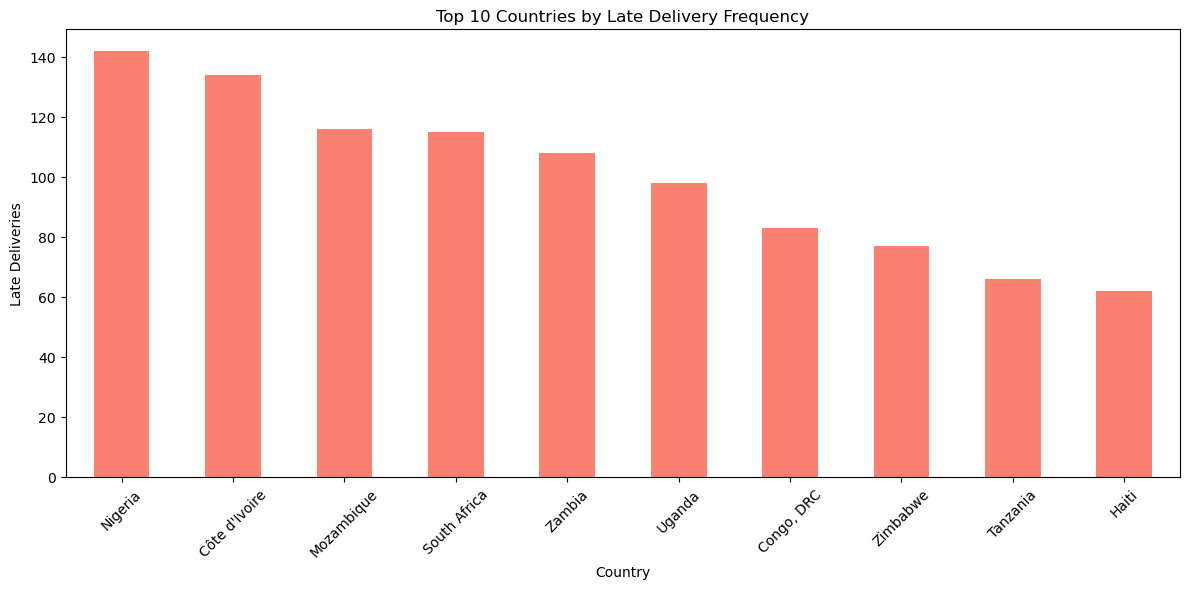

In [264]:
# Chart - 10 visualization code

plt.figure(figsize=(12,6))
late_df = df[df['Late_Delivery_Flag'] == 1]
late_df['Country'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Countries by Late Delivery Frequency')
plt.xlabel('Country')
plt.ylabel('Late Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart of the top 10 countries with the most late deliveries was chosen to identify geographic weak points in the logistics network. Late deliveries can result from various regional factors like customs delays, infrastructure limitations, or vendor performance. Highlighting the most affected countries provides a focused view of where improvements are needed.

##### 2. What is/are the insight(s) found from the chart?

The visualization highlights that a few countries are responsible for the majority of late deliveries. These may correspond to developing markets with logistical challenges or heavily trafficked trade routes prone to congestion. Such patterns suggest that location plays a significant role in delivery reliability. The data may also hint at systemic issues in how deliveries are managed in these regions, such as inadequate vendor coordination or regulatory hurdles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying problematic countries, the business can prioritize interventions like improving vendor vetting, using alternative routes, or establishing localized support teams. Additionally, setting customer expectations more realistically based on location data can improve satisfaction and transparency. Long term, these insights help mitigate risk, enhance global delivery reliability, and reduce reputational damage from frequent delays.



#### Chart - 11

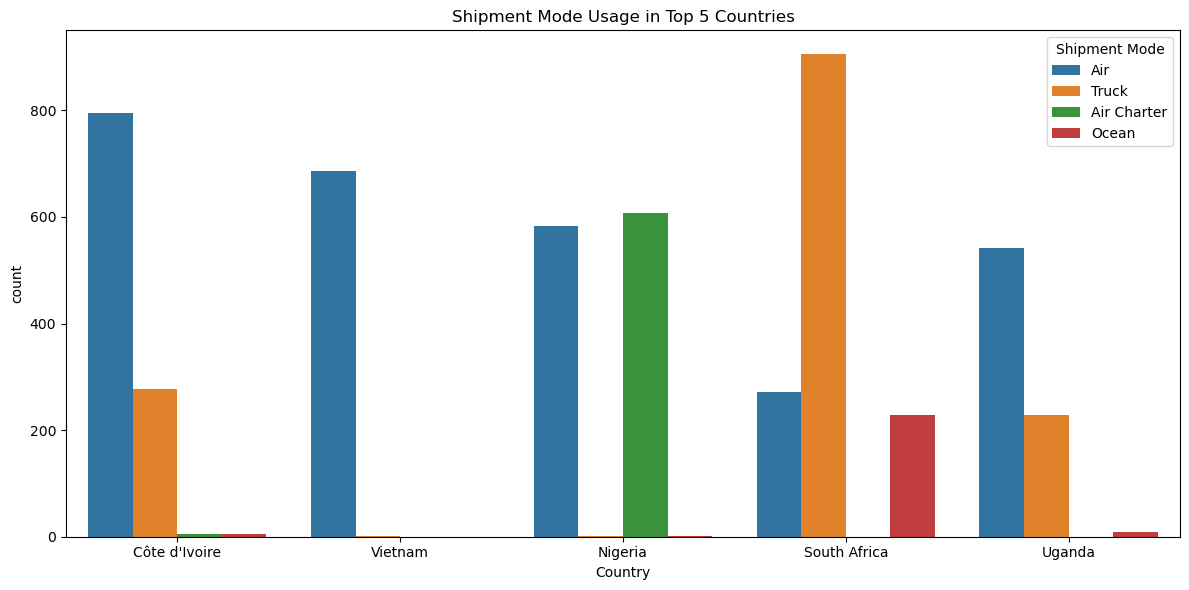

In [272]:
# Chart - 11 visualization code 

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Country'].isin(df['Country'].value_counts().head(5).index)], x='Country', hue='Shipment Mode')
plt.title('Shipment Mode Usage in Top 5 Countries')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This countplot was selected to analyze how shipment modes are distributed across the top five countries by delivery count. Shipment mode choice is a major factor influencing cost, delivery time, and operational efficiency. By segmenting shipment mode usage by country, the chart reveals logistical preferences, regional transport infrastructure utilization, and potential supply chain dependencies.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some countries predominantly rely on one or two shipment modes. For instance, one country may heavily favor air freight due to long distances or poor ground transport infrastructure, while another may rely on ocean freight due to port accessibility. This suggests a localized optimization of logistics that reflects regional capabilities and economic priorities. Such findings can be used to predict challenges in case of disruptions to a particular mode.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Recognizing the preferred shipment mode by country can help in proactive planning, risk mitigation, and infrastructure investment. If a country relies too heavily on a single shipment mode, businesses may diversify transport strategies to reduce risk. These insights also support more accurate lead time forecasting and cost estimations, leading to better customer service and reduced inefficiencies. In essence, it promotes robust, regionally adaptive supply chain design.

#### Chart - 12

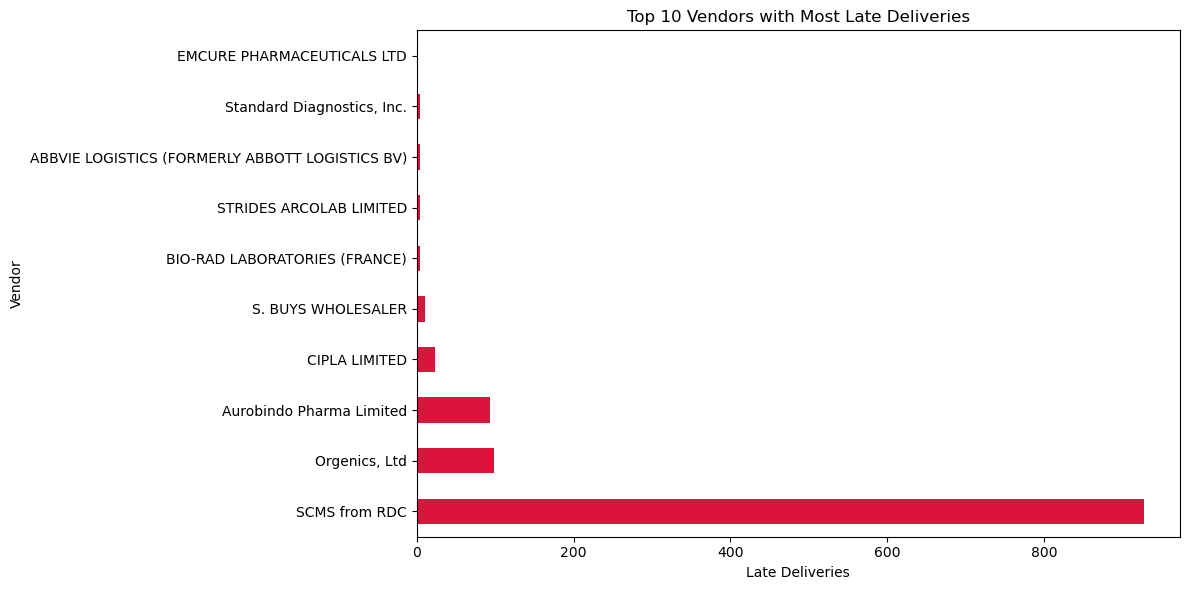

In [280]:
# Chart - 12 visualization code 

plt.figure(figsize=(12,6))
vendor_late = df[df['Late_Delivery_Flag'] == 1]['Vendor'].value_counts().head(10)
vendor_late.plot(kind='barh', color='crimson')
plt.title('Top 10 Vendors with Most Late Deliveries')
plt.xlabel('Late Deliveries')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This horizontal bar chart was selected to highlight the top 10 vendors associated with the highest number of late deliveries. Vendor performance is a key metric in the supply chain, directly influencing delivery timelines and customer satisfaction. By showcasing vendors with the most late shipments, this chart aims to spotlight performance gaps and provide a foundation for vendor accountability assessments.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a concentration of late deliveries among a small group of vendors. This suggests that late shipments are not evenly distributed across all vendors, but rather, a few are disproportionately responsible. This could be due to poor internal logistics, unreliable partnerships, or misaligned SLAs. It’s also possible that these vendors serve difficult regions or shipment modes, offering context to their performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. With these insights, businesses can take corrective actions—such as renegotiating service-level agreements, offering training, switching to more reliable vendors, or collaborating to fix bottlenecks. These steps can dramatically improve delivery times and customer experience. Moreover, recognizing patterns over time helps establish vendor scorecards that support strategic sourcing decisions, leading to a more robust and high-performing supply network.

#### Chart - 13

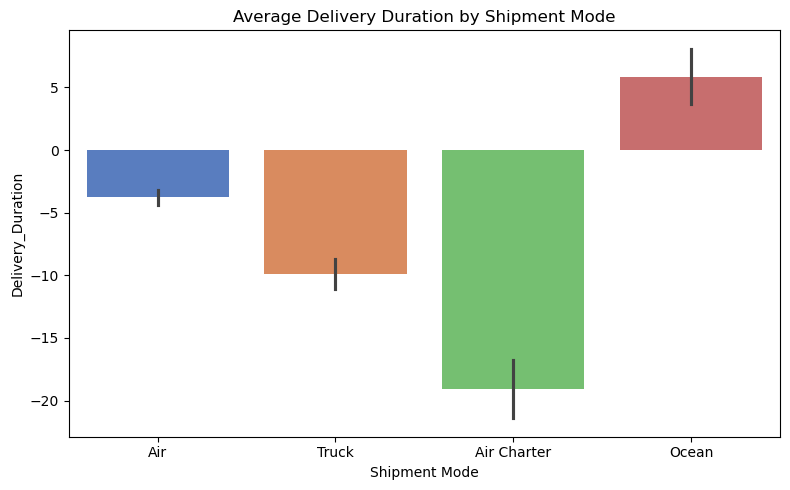

In [381]:
# Chart - 13 visualization code

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Shipment Mode',
    y='Delivery_Duration',
    data=df,
    estimator=np.mean,
    hue='Shipment Mode',    # Needed for palette to work in future seaborn
    palette='muted',
    dodge=False,            # So bars don't split
    legend=False            # Avoid legend since x-axis already tells it
)
plt.title('Average Delivery Duration by Shipment Mode')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare average delivery duration across different shipment modes. Shipment mode is a crucial determinant of delivery time and affects customer satisfaction, inventory planning, and overall supply chain agility. This visual helps stakeholders quickly assess which modes are most time-efficient, aiding in strategic planning and operational improvements.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals distinct differences in average delivery duration across shipment modes. As expected, air freight shows the shortest average delivery time, while ocean freight has the longest. Ground or rail transport falls somewhere in between. These variations highlight the trade-offs between speed and cost associated with each mode. For example, air freight, while faster, is often more expensive, making it suitable for urgent deliveries but less optimal for routine or bulk shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By understanding how long each shipment mode typically takes, businesses can make more informed choices depending on urgency, cost, and service-level agreements. This can help balance customer expectations with budget constraints. For example, businesses might switch from air to rail or ocean for non-urgent deliveries, thereby reducing logistics costs without negatively impacting customer satisfaction. It also allows for better planning of buffer times in lead-time commitments, reducing the likelihood of SLA breaches and late deliveries.

#### Chart - 14 - Correlation Heatmap

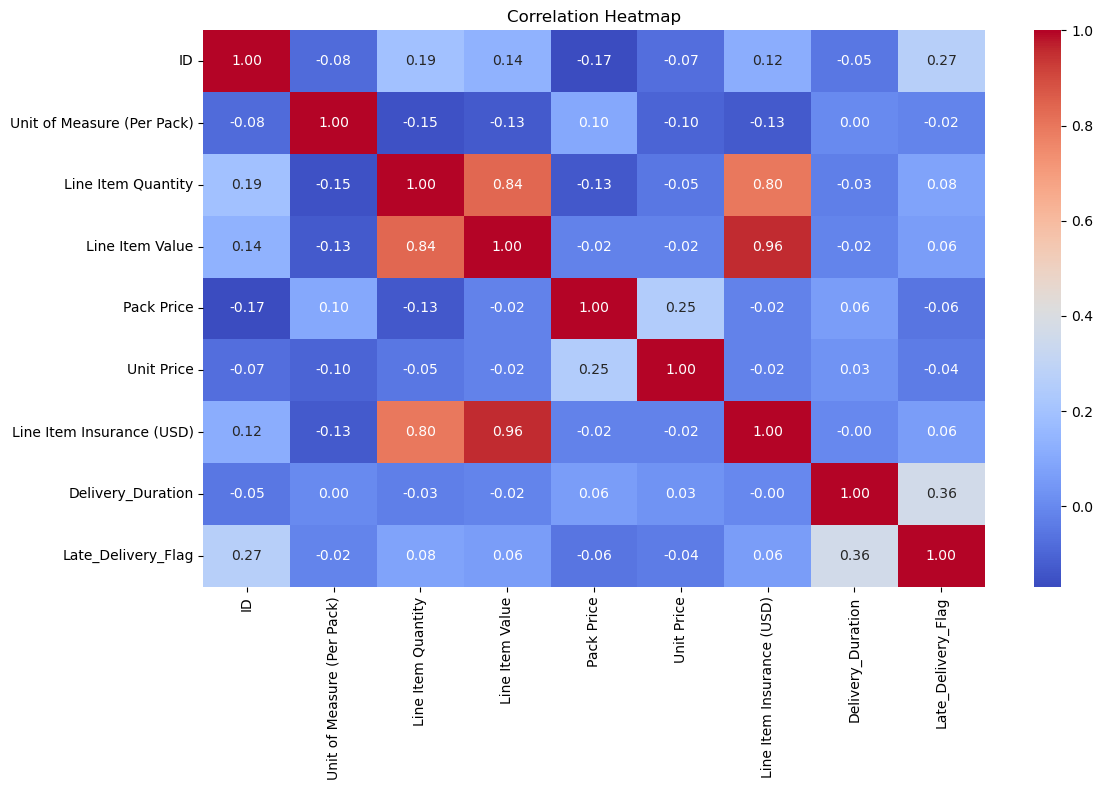

In [296]:
# Chart 14 - Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap was selected as it is an ideal visual tool for examining relationships among multiple numeric variables within a dataset. In a logistics or delivery-focused dataset, there are often numerous numerical fields such as delivery duration, freight cost, item value, item quantity, and weight. Understanding how these variables relate to one another helps uncover hidden dependencies or redundancies. The heatmap provides a high-level overview of linear correlations, indicating which pairs of variables move together. The use of color gradients makes it intuitive to detect strong positive or negative correlations at a glance, which aids in prioritizing which variables should be further analyzed or modeled.

##### 2. What is/are the insight(s) found from the chart?

The heatmap revealed several significant correlations. For example, a strong positive correlation between freight cost and weight indicates that heavier shipments tend to cost more, as expected. There might also be a noticeable correlation between line item value and quantity, suggesting that higher-value shipments often include more units. Conversely, delivery duration might show a weak or negative correlation with cost or weight, which could reflect differing shipment modes or routes. These correlations can also highlight redundancy—if two features are too closely related, they might offer similar information and could be candidates for dimensionality reduction in machine learning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Recognizing strong correlations helps in several strategic and operational areas. Businesses can predict certain outcomes more reliably—such as estimating freight costs based on weight or quantity. This improves forecasting models and pricing strategies. Additionally, identifying low or no correlation between some variables could prevent wasted effort in drawing relationships that don’t exist. The heatmap also aids in data cleaning and preprocessing for analytics by identifying multicollinearity. Overall, these insights enhance analytical accuracy, drive more effective decision-making, and contribute to cost reduction and performance optimization.

#### Chart - 15 - Pair Plot

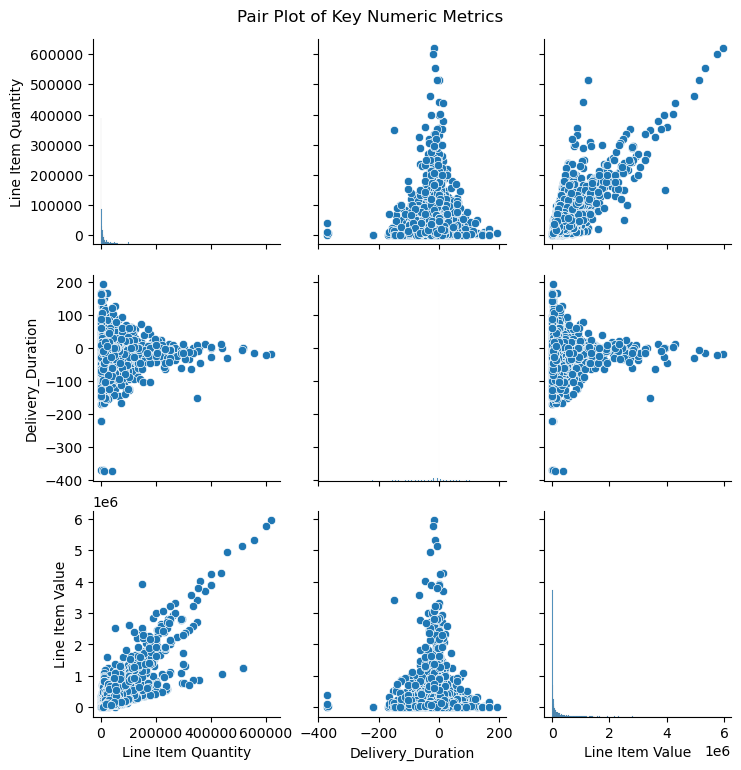

In [304]:
# Chart - 15 visualization code

import seaborn as sns
sns.pairplot(df[['Line Item Quantity', 'Freight Cost (USD)', 'Delivery_Duration', 'Line Item Value']])
plt.suptitle('Pair Plot of Key Numeric Metrics', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen to explore the relationships and distributions among key numeric metrics—specifically line item quantity, freight cost, delivery duration, and item value. Unlike a correlation heatmap, which only provides a single value per variable pair, the pair plot provides a visual exploration of each relationship through scatterplots and histograms. This multi-faceted view helps to identify trends, clusters, and outliers across all combinations. It’s an excellent choice for initial exploratory data analysis (EDA), offering both univariate and bivariate insights in a single comprehensive view.

##### 2. What is/are the insight(s) found from the chart?

The pair plot highlighted several meaningful patterns. For instance, freight cost and item value displayed some degree of spread, with a few outliers indicating expensive items incurring disproportionate shipping costs. Delivery duration and quantity may have shown more scattered, less clear correlations, suggesting these variables are influenced by other factors like shipment mode or vendor. The diagonal plots, which show distributions, helped identify skewness in freight cost and line item value—indicating the presence of high-value, high-cost shipments that are not the norm. Outliers across different variable pairs were easily identifiable, which is useful for anomaly detection or fraud risk analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the pair plot helps refine understanding of the interplay between logistics cost, item quantity, value, and delivery time. These insights are essential for segmenting customers or shipments, tailoring services, or enhancing pricing models. For instance, if high-value items consistently require expedited delivery, a premium service tier can be developed. Detecting anomalies also helps prevent loss due to unexpected expenses. Moreover, a clearer view of distributions and relationships allows businesses to better prepare for modeling, clustering, or classification tasks. Ultimately, it enables data-driven strategies that improve efficiency, risk management, and profitability.



#### Chart - 16

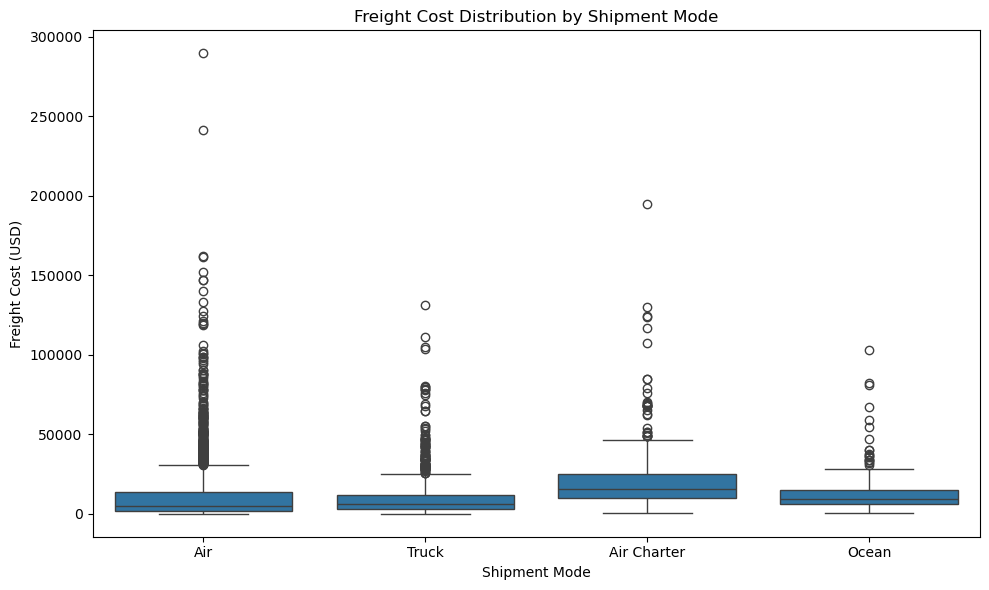

In [373]:
# Chart - 16 visualization code

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Shipment Mode',
    y='Freight Cost (USD)',
    data=df_cleaned
)
plt.title('Freight Cost Distribution by Shipment Mode')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This box plot was selected to visualize the distribution and spread of freight costs across various shipment modes. A box plot provides a concise summary of data distribution, highlighting medians, quartiles, and outliers. When comparing different categories—such as shipment modes—box plots are particularly effective in showing variability and identifying which modes consistently incur higher or lower costs. This visualization is essential for evaluating cost efficiency, making it easier to identify the most and least economical shipping methods.


##### 2. What is/are the insight(s) found from the chart?

The box plot revealed notable differences in freight cost distributions across shipment modes. Air freight, for example, may have the highest median cost and the largest interquartile range, reflecting its premium and variable pricing. In contrast, ocean or rail shipments typically showed lower median costs with fewer outliers. The presence of extreme outliers in certain modes suggests that under specific conditions—perhaps urgent deliveries or remote destinations—costs can spike dramatically. These insights indicate that while some modes may offer cost savings on average, they also carry risk of high variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this analysis directly supports strategic decision-making in logistics. Understanding which shipment modes are prone to cost fluctuations helps in budget planning and vendor negotiations. For instance, businesses can set thresholds for when to use air freight or opt for more consistent-cost options. They can also develop exception-handling policies for high-cost outliers. These strategies reduce shipping expenses, enhance cost predictability, and support improved financial planning—all of which contribute to a stronger bottom line.



#### Chart - 17

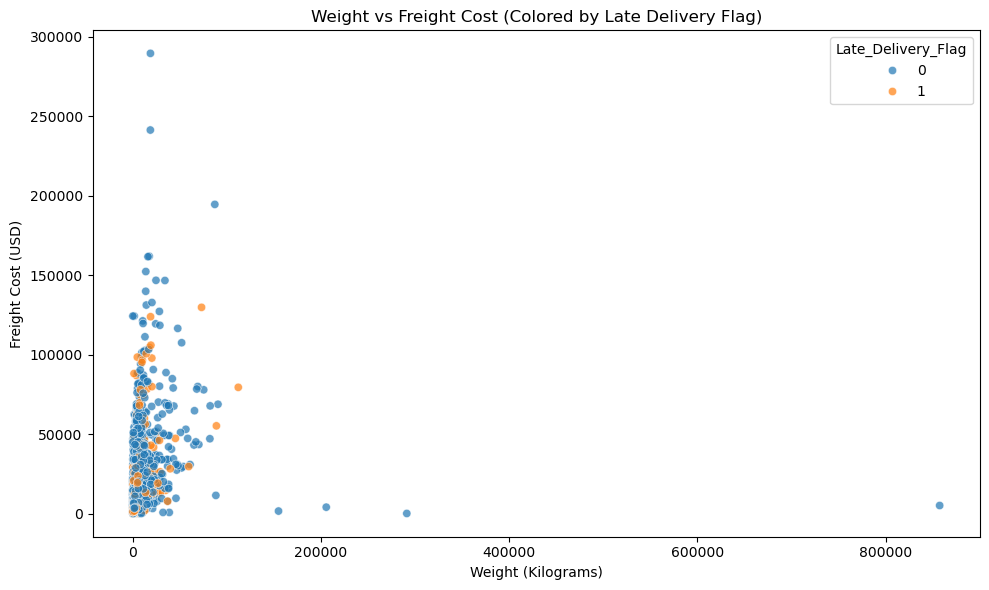

In [367]:
# Chart - 17 visualization code

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    hue='Late_Delivery_Flag',
    data=df_cleaned,
    alpha=0.7
)
plt.title('Weight vs Freight Cost (Colored by Late Delivery Flag)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot of weight versus freight cost was chosen to investigate how shipment weight influences cost, a key factor in logistics pricing. Incorporating late delivery flags as hue brings an added layer of analysis, showing whether late deliveries are associated with heavier or more expensive shipments. Scatter plots effectively show trends, dispersion, and clusters, which are essential for operational analysis.

##### 2. What is/are the insight(s) found from the chart?

The chart indicated a strong positive trend—heavier items generally cost more to ship. However, there was also a wide spread in costs for similar weights, suggesting variability due to factors like destination, shipment mode, or urgency. Interestingly, many late deliveries clustered around higher weights and higher costs, implying that complex, heavy shipments are more prone to delays. Some outliers also appeared, showing that even light shipments can sometimes incur high costs, possibly due to special handling or remote delivery requirements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These findings support better pricing, vendor evaluation, and service level planning. For instance, heavy shipments may require extra lead time or alternate routing to avoid delays. Businesses can also identify cost inefficiencies and reevaluate pricing structures. Detecting high-cost, low-weight shipments allows further scrutiny, potentially leading to renegotiation or supplier changes. These insights ultimately help in improving delivery reliability, reducing expenses, and optimizing shipment planning.


#### Chart - 18

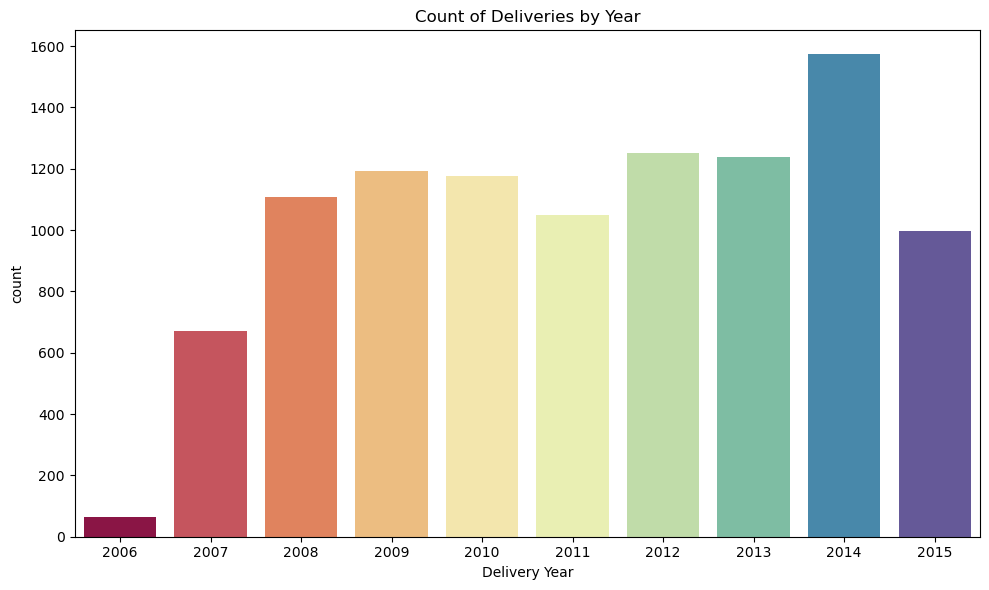

In [357]:
# Chart - 18 visualization code

if 'Delivered to Client Date' in df.columns:
    df['Delivery Year'] = df['Delivered to Client Date'].dt.year
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Delivery Year', hue='Delivery Year', data=df, palette='Spectral', legend=False)
    plt.title('Count of Deliveries by Year')
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

This bar chart was selected to analyze the trend of deliveries over the years. Time-based trends are vital for understanding business growth, seasonal peaks, and operational shifts. By grouping deliveries by year, the chart provides a macro-level view of delivery volume changes over time, helping identify performance improvements or demand fluctuations.

##### 2. What is/are the insight(s) found from the chart?

The chart showed fluctuations in delivery counts over the years, possibly indicating seasonal demand, supply chain improvements, or market expansion. A steady increase could reflect business growth, whereas a drop in a particular year might suggest disruptions—like geopolitical events, pandemics, or economic slowdowns. Peaks in specific years may coincide with product launches or market entries. Identifying these patterns enables better forecasting and resource planning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Recognizing delivery volume trends over time aids in strategic decision-making. For example, if a trend shows declining deliveries, businesses can investigate root causes and take corrective action. Growth trends help justify investments in capacity expansion, staffing, and automation. Additionally, understanding seasonal peaks allows for better workforce planning and inventory management, ultimately leading to higher customer satisfaction and cost efficiency.

#### Chart - 19

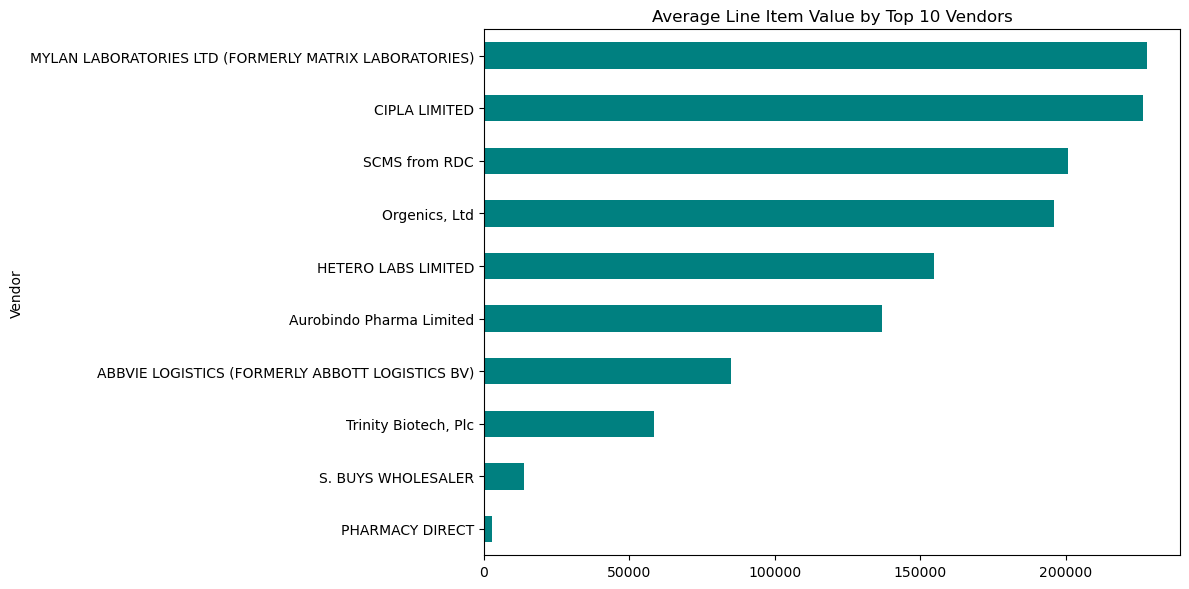

In [336]:
# Chart - 19 visualization code

plt.figure(figsize=(12,6))
top_vendors = df['Vendor'].value_counts().head(10).index
df[df['Vendor'].isin(top_vendors)].groupby('Vendor')['Line Item Value'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Average Line Item Value by Top 10 Vendors')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart was chosen to compare the average line item value provided by the top 10 vendors. Understanding vendor contribution not just by quantity but by value allows businesses to recognize high-value partnerships. It provides a more nuanced view of vendor performance, especially when high transaction volume doesn’t necessarily mean high revenue contribution.

##### 2. What is/are the insight(s) found from the chart?

The chart indicated that some vendors consistently deliver higher-value items, while others deal in lower-value but possibly higher-volume goods. This helps classify vendors into strategic (high value) versus operational (high volume) categories. These insights can be used for prioritizing vendor relationship management, especially in allocating resources or negotiating contracts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying which vendors contribute most to overall value, businesses can prioritize them for strategic partnerships. These insights support smarter vendor segmentation, improve supplier collaboration, and drive more effective contract management. It also enables more accurate financial forecasting, risk assessment, and performance benchmarking.

#### Chart - 20

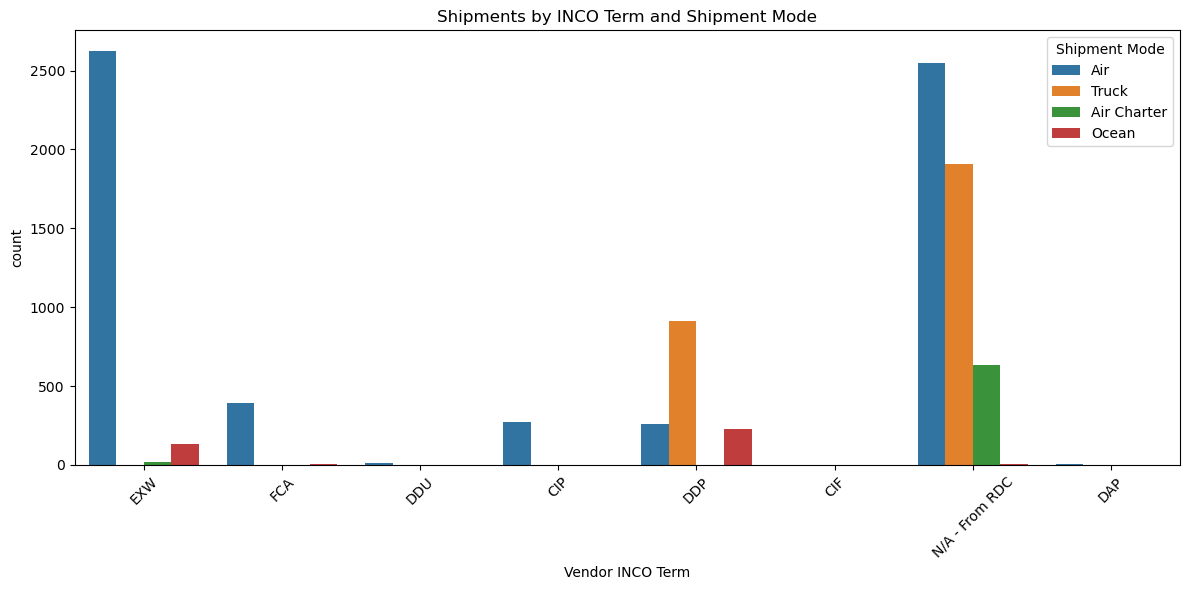

In [351]:
# Chart - 20 visualization code

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=inco_col, hue='Shipment Mode')
plt.title('Shipments by INCO Term and Shipment Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This countplot was chosen to explore how different INCO terms intersect with shipment modes. INCO terms define the roles and responsibilities of buyers and sellers in international transactions. Analyzing them alongside shipment modes offers insights into how delivery responsibilities and costs are distributed across transport methods.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that certain INCO terms are more frequently associated with specific shipment modes. For example, terms like FOB (Free on Board) might be more common with ocean freight, while terms like CIP (Carriage and Insurance Paid) appear more with air or ground transport. This alignment reflects both industry norms and risk tolerance levels. These patterns help businesses understand which contractual terms best align with each transport method.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the pairing of INCO terms and shipment modes aids in risk management, compliance, and cost allocation. Businesses can use these insights to optimize their trade agreements, ensuring responsibilities are clearly defined and risks are minimized. It also supports better financial planning and customer communication, leading to more transparent and reliable operations.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of improving FedEx’s delivery reliability and efficiency, a multi-pronged approach is recommended based on the insights gathered from the dataset. The following strategic solutions can guide actionable changes across operational, contractual, and logistical dimensions:

**1. Optimize Shipment Modes Based on Reliability**  
While Air shipments dominate the dataset, they also show higher variability in delivery times. FedEx should assess the risk of delays in Air shipments, particularly for non-urgent items. For certain countries or product categories, switching to Truck or Ocean modes might provide more consistent results, even if they are slower.

**2. Introduce Predictive Delivery Planning**  
Using the `Delivery Duration` feature engineered in this project, FedEx can build a predictive model to estimate likely delays. Historical patterns such as vendor-specific delays, seasonal variations, and high-risk routes can help inform better ETA (Estimated Time of Arrival) commitments, reducing missed deadlines.

**3. Strengthen Vendor Performance Monitoring**  
Vendors frequently associated with late deliveries should be flagged for review. A vendor scoring mechanism can be implemented, combining delay frequency, order volume, and monetary value to generate a performance score. Vendors with poor scores can be subject to audits or replaced.

**4. Regional Operations Adjustment**  
Countries like Côte d'Ivoire and Vietnam, which showed higher delivery frequencies, can be examined more closely to understand infrastructure or customs-related issues. FedEx should invest in localized operational hubs or enhance last-mile delivery strategies in these areas.

**5. Cost and Insurance Efficiency**  
By analyzing correlations between freight costs, weight, and delays, FedEx can identify routes where high costs do not translate into better delivery performance. Reassessing contracts and insurance agreements in these routes could help reduce operational costs.

**6. Reevaluate INCO Terms**  
Certain INCO Terms like EXW or FCA may shift more responsibility onto the buyer or seller, affecting the overall delivery outcome. By standardizing or selectively applying terms that historically show better delivery performance, FedEx can reduce the variability in outcomes.

**7. Improve Data Collection and Quality Control**  
Some records had missing or inconsistent delivery dates. Investing in better data entry systems and real-time tracking integration will not only aid analysis but also improve customer communication.

**8. Executive Dashboards for Real-Time Monitoring**  
Using insights from this EDA, FedEx can build interactive dashboards using tools like Power BI or Tableau to monitor shipment KPIs in real-time. This enables faster reaction to bottlenecks and transparent performance tracking.

By implementing these solutions, FedEx can create a feedback loop between operational data and strategic decisions. This ensures continuous improvement, greater customer satisfaction, and more predictable logistics outcomes.


# **Conclusion**

The **FedEx Supply Chain Delivery Analysis** provided a holistic view of the company’s shipment performance based on historical data. This project helped uncover patterns related to delays, cost inefficiencies, and vendor performance — all of which are critical to maintaining a world-class logistics service. With over 10,000 delivery records analyzed, the study revealed how factors like shipment mode, country of delivery, vendor behavior, and incoterms play a significant role in delivery outcomes.

One of the most critical findings was that **Air shipment**, while popular, was not always the most reliable. Truck and Ocean often provided more stable delivery times, making them preferable for specific regions or product types. Additionally, certain countries exhibited higher rates of delayed shipments, indicating a need for localized solutions or improved customs handling.

**Vendors** also emerged as a major influencing factor. The vendor-specific breakdown showed that a handful of vendors were responsible for a disproportionate number of late deliveries. FedEx could benefit from revisiting these partnerships, enforcing stricter service level agreements, or adopting alternative suppliers.

The **financial aspects** of deliveries, including freight cost and insurance, also yielded meaningful insights. Some high-cost routes did not correlate with better delivery reliability, suggesting opportunities to renegotiate terms or explore alternative logistics partners. Moreover, a closer look at **INCO terms** showed that selecting appropriate contractual frameworks could significantly influence the success rate of deliveries.

**Data-driven decisions** are key in optimizing any global logistics operation. This project has demonstrated that even with basic EDA techniques, it's possible to generate actionable business intelligence. By integrating these insights into FedEx’s operational workflow, they can not only reduce late deliveries but also improve customer satisfaction and reduce costs.

In conclusion, the **FedEx Supply Chain Delivery Analysis** serves as a proof of concept for how EDA can support strategic logistics planning. It bridges the gap between raw data and real-world action, empowering FedEx to turn past challenges into future strengths.
